# QCASim structure evaluator

In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

WORK_DIR = '.'
QCA_DESIGN_FILES = [
    '../examples/line.qcd', '../examples/line-clocked.qcd', 
    '../examples/inverter.qcd', 
    '../examples/majority.qcd', '../examples/majority-diagonal.qcd', 
    '../examples/memory-cell.qcd'
]

In [2]:
def get_design_dir(design_file):
    design_name = os.path.splitext(os.path.basename(design_file))[0]
    return os.path.join(WORK_DIR, design_name)

### Prepare and purge workdir

In [ ]:
for design_file in QCA_DESIGN_FILES:
    output_dir = get_design_dir(design_file)
    if not os.path.exists(output_dir):
        print(f'Creating output directory: {output_dir}')
        os.makedirs(output_dir)
    else:
        print(f'Clearing output directory already exists: {output_dir}')
        confirmation = input('Are you sure you want to delete all files in this directory? (y/n): ')
        if confirmation.lower() != 'y':
            print('Aborting.')
            sys.exit(1)
        for f in os.listdir(output_dir):
            os.remove(os.path.join(output_dir, f))


Clearing output directory already exists: ./line
Clearing output directory already exists: ./line-clocked
Clearing output directory already exists: ./inverter
Clearing output directory already exists: ./majority
Clearing output directory already exists: ./majority-diagonal
Clearing output directory already exists: ./memory-cell


### Generate the design variatons

In [9]:
from gen_designs import generate_designs

CELL_SIZES = np.arange(50, 150, 5) # nm
DOT_RADIUS = np.arange(14, 30, 0.5) # nm

for design_file in QCA_DESIGN_FILES:
    output_dir = get_design_dir(design_file)
    print(f'Generating designs for {design_file} in {output_dir}')
    generate_designs(design_file, output_dir, CELL_SIZES, DOT_RADIUS)

Generating designs for ../examples/memory-cell.qcd in ./memory-cell


### Run simulations

In [10]:
from run_sim import run_simulations

generated_design_files = []

for design_file in QCA_DESIGN_FILES:
    output_dir = get_design_dir(design_file)
    for f in os.listdir(output_dir):
        if f.endswith('.qcd'):
            generated_design_files.append(os.path.join(output_dir, f))

run_simulations(generated_design_files)

[1/672] ✓ Completed: memory-cell_150_21.5.qcd
[2/672] ✓ Completed: memory-cell_145_15.5.qcd
[3/672] ✓ Completed: memory-cell_90_16.5.qcd
[4/672] ✓ Completed: memory-cell_120_24.5.qcd
[5/672] ✓ Completed: memory-cell_115_26.5.qcd
[6/672] ✓ Completed: memory-cell_95_18.0.qcd
[7/672] ✓ Completed: memory-cell_110_28.0.qcd
[8/672] ✓ Completed: memory-cell_95_25.0.qcd
[9/672] ✓ Completed: memory-cell_85_22.5.qcd
[10/672] ✓ Completed: memory-cell_65_15.5.qcd
[11/672] ✓ Completed: memory-cell_70_21.5.qcd
[12/672] ✓ Completed: memory-cell_120_19.5.qcd
[13/672] ✓ Completed: memory-cell_55_19.0.qcd
[14/672] ✓ Completed: memory-cell_105_21.0.qcd
[15/672] ✓ Completed: memory-cell_140_26.0.qcd
[16/672] ✓ Completed: memory-cell_110_15.0.qcd
[17/672] ✓ Completed: memory-cell_50_17.5.qcd
[18/672] ✓ Completed: memory-cell_125_17.0.qcd
[19/672] ✓ Completed: memory-cell_145_28.5.qcd
[20/672] ✓ Completed: memory-cell_130_23.0.qcd
[21/672] ✓ Completed: memory-cell_105_18.5.qcd
[22/672] ✓ Completed: memory-c

KeyboardInterrupt: 

### Truth analysis

In [3]:
from analyze_truth import analyze_simulation_files, LogicFunction, write_analysis_to_csv

for design_file in QCA_DESIGN_FILES:
    output_dir = get_design_dir(design_file)
    simulation_files = []
    for f in os.listdir(output_dir):
        if f.endswith('.qcs'):
            simulation_files.append(os.path.join(output_dir, f))

    logic_function = None
    if 'line' in design_file:
        logic_function = LogicFunction.WIRE
    elif 'inverter' in design_file:
        logic_function = LogicFunction.INVERTER
    elif 'majority' in design_file:
        logic_function = LogicFunction.MAJORITY
    elif 'memory-cell' in design_file:
        logic_function = LogicFunction.MEMORY_CELL
    else:
        raise RuntimeError(f'Unknown design file logic function: {design_file}')
    
    delays = []
    if 'clocked' in design_file:
        delays = ['O4:1']

    print(f'Analyzing simulations for {design_file} in {output_dir}')
    results = analyze_simulation_files(simulation_files, logic_function, delays)
    
    csv_output_path = os.path.join(output_dir, 'truth_analysis.csv')
    write_analysis_to_csv(results, csv_output_path)
    print(f'Results written to {csv_output_path}')

Analyzing simulations for ../examples/line.qcd in ./line
Results written to ./line/truth_analysis.csv
Analyzing simulations for ../examples/line-clocked.qcd in ./line-clocked
Results written to ./line-clocked/truth_analysis.csv
Analyzing simulations for ../examples/inverter.qcd in ./inverter
Results written to ./inverter/truth_analysis.csv
Analyzing simulations for ../examples/majority.qcd in ./majority
Results written to ./majority/truth_analysis.csv
Analyzing simulations for ../examples/majority-diagonal.qcd in ./majority-diagonal
Results written to ./majority-diagonal/truth_analysis.csv
Analyzing simulations for ../examples/memory-cell.qcd in ./memory-cell
Results written to ./memory-cell/truth_analysis.csv


### Plot truth analysis

Generating plot for ../examples/line.qcd


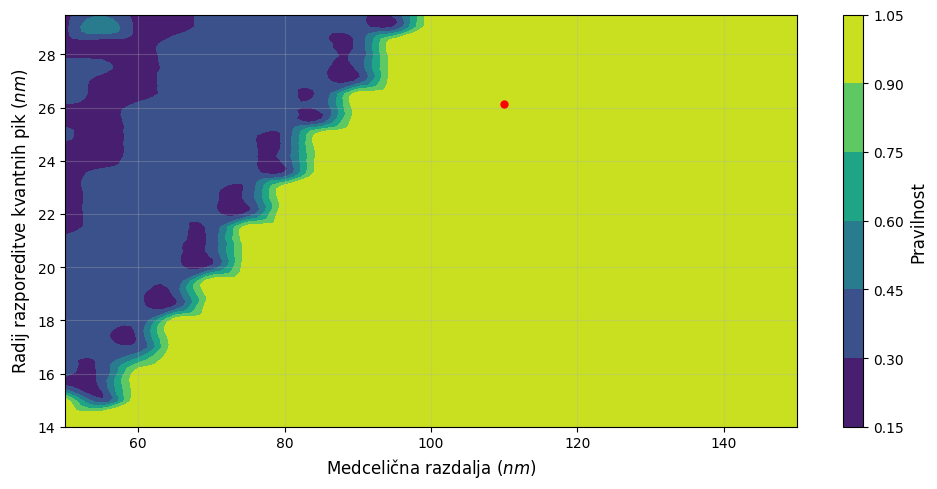

Generating plot for ../examples/line-clocked.qcd


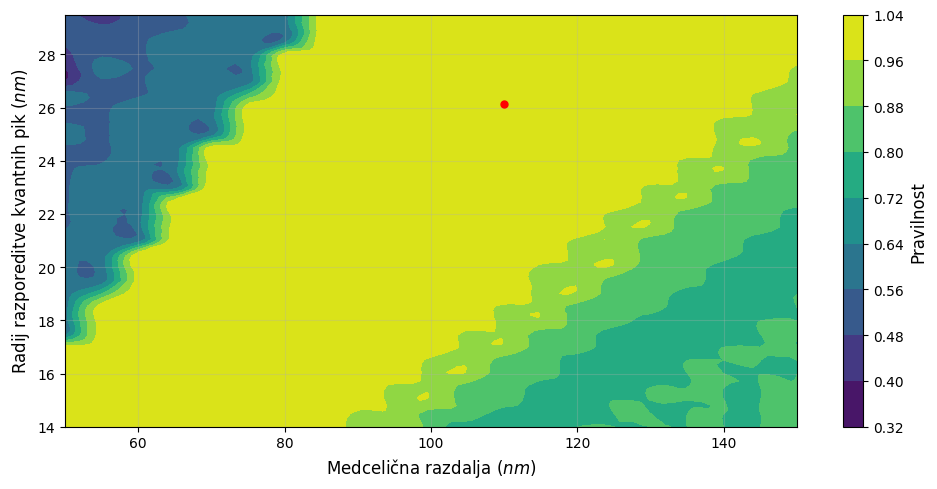

Generating plot for ../examples/inverter.qcd


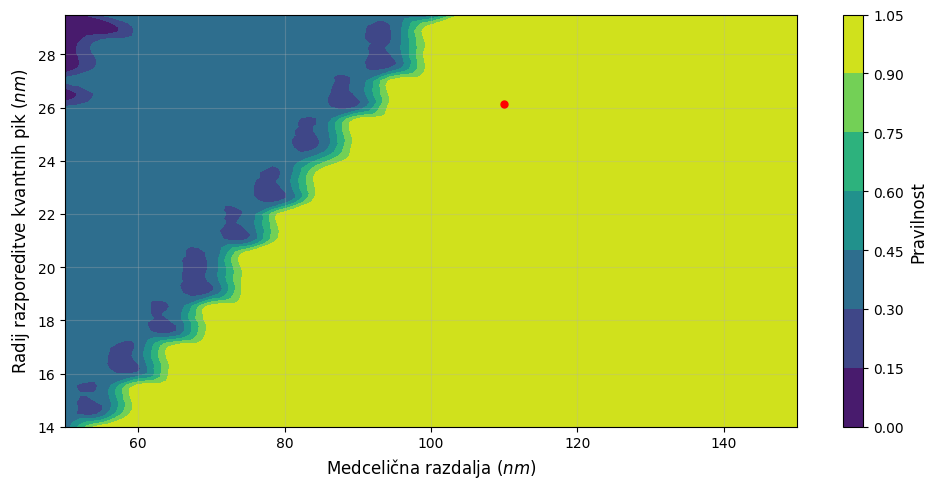

Generating plot for ../examples/majority.qcd


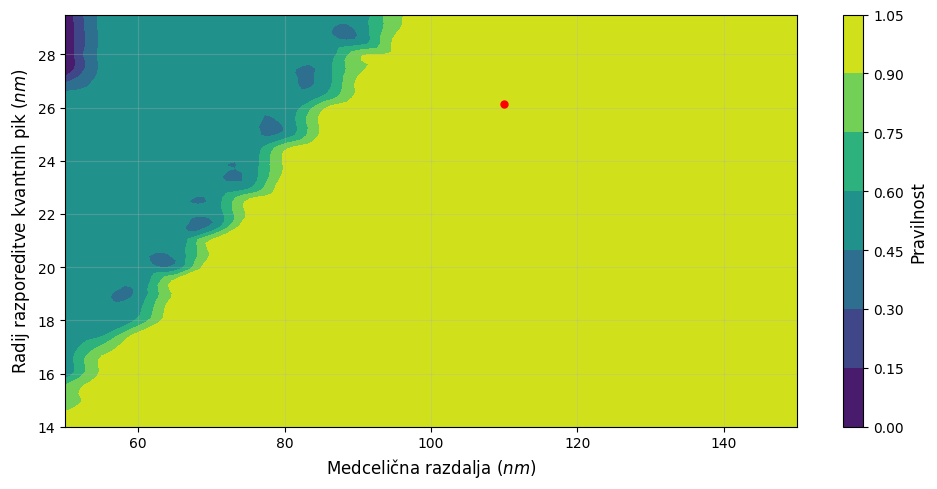

Generating plot for ../examples/majority-diagonal.qcd


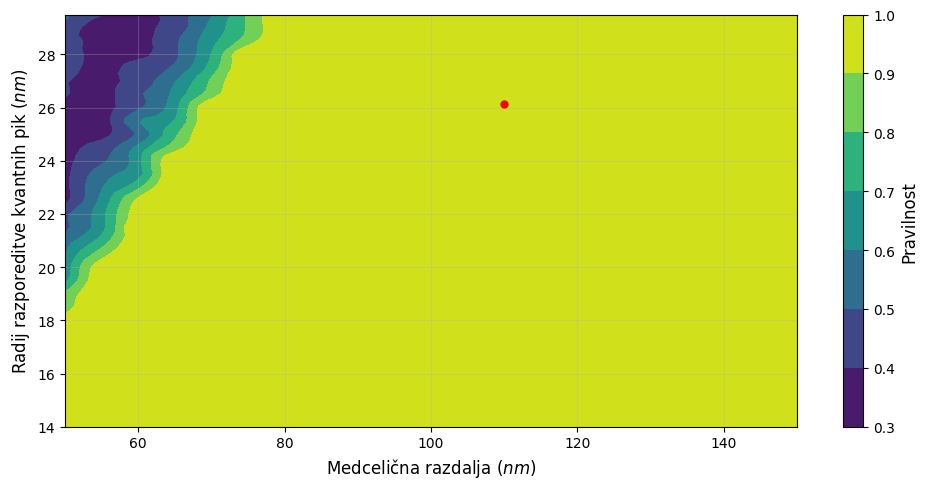

Generating plot for ../examples/memory-cell.qcd


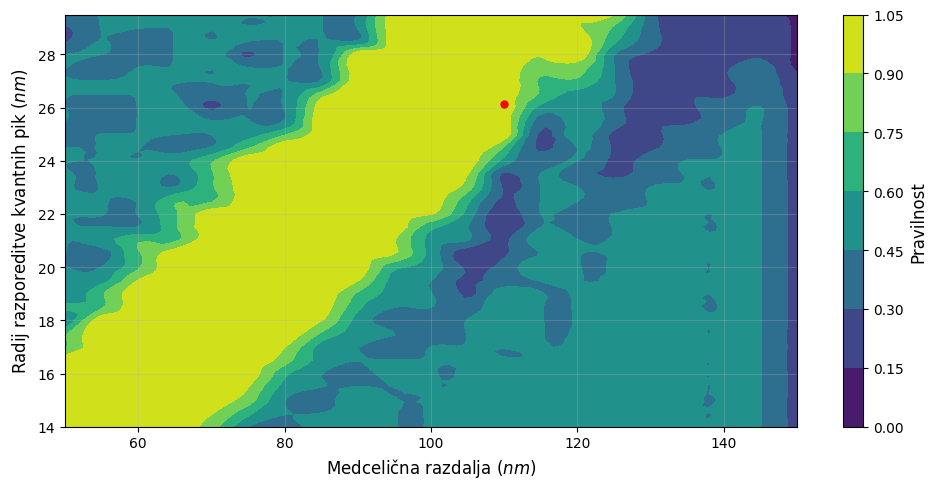

Generating combined plot for all designs


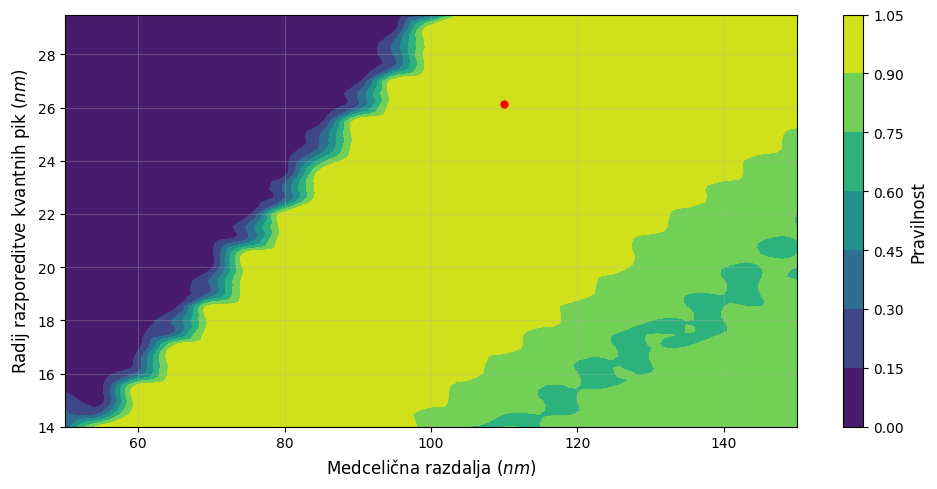

In [3]:
from visualize_truth import visualize_truth_analysis

truth_analysis_files = []
for design_file in QCA_DESIGN_FILES:
    output_dir = get_design_dir(design_file)
    truth_analysis_csv = os.path.join(output_dir, 'truth_analysis.csv')
    truth_analysis_files.append(truth_analysis_csv) 

    plot_filename = os.path.join(output_dir, 'truth_visualization.pdf')
    print(f'Generating plot for {design_file}')
    visualize_truth_analysis([truth_analysis_csv], plot_filename)

print('Generating combined plot for all designs')
visualize_truth_analysis(truth_analysis_files[:-1], os.path.join(WORK_DIR, 'all_designs_truth_visualization.pdf'))